Dear Participant,

Please find below the project details.

The data set was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multi-valued discrete and 4 continuous variables. 

Dataset: cars-dataset.csvView in a new window

Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multi-valued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Acceleration – continuous

Yr – Model of the car – Multivalued discrete

Mpg - Miles per gallon - continuous

Steps to follow:

EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points
Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_df = pd.read_csv('cars-dataset.csv')
data_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


### EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [3]:
# Here we replace the ? in HP column with the median value. We can drop also those rows with hp = ?. 
# But lets go with median value of hp for missing cells.
data_df = data_df.replace('?',np.nan)
data_df['hp'].fillna(data_df['hp'].median(), inplace = True)

In [4]:
data_df['hp'] = data_df['hp'].astype(float)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


 Now all features are numeric except Car name column which we can drop as it is not required.

In [5]:
data_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [6]:
data_df.groupby(['cyl']).count()

,car name,disp,hp,wt,acc,yr,mpg
cyl,,,,,,,
3,4,4,4,4,4,4,4
4,204,204,204,204,204,204,204
5,3,3,3,3,3,3,3
6,84,84,84,84,84,84,84
8,103,103,103,103,103,103,103


### Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points

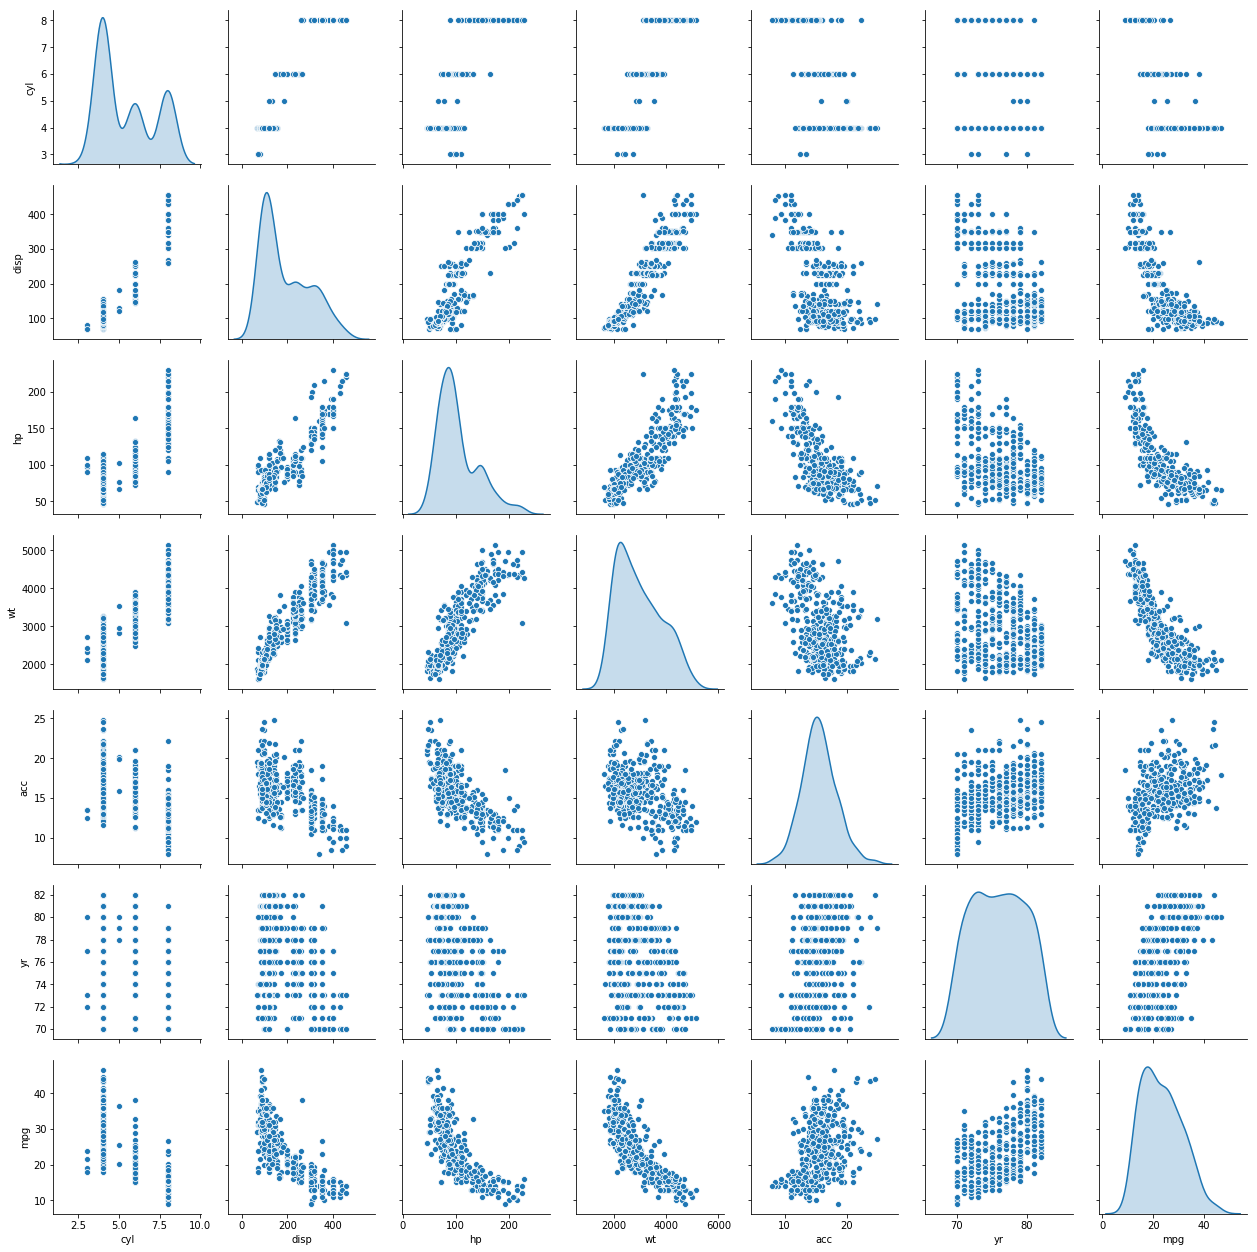

In [10]:
sns.pairplot(data_df, diag_kind='kde')
# Some quick points we can interprete from pairplot are -
# 1. mpg has good negative relation with cyl,disp,hp,wt. Also disp, hp and wt among them have good positive relation. 
# May be we can keep any one feature out of cyl,disp,hp,wt, as all 3 features are having strong correlation.
# 2. mpg has positive relation with yr
# 3. cyl has these discrete values - 3,4,5,6,8 and that is why we see the different Gaussian curves. May be 
# we shall find same no . of clusters too


## Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

## Using K Means

In [7]:
data_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [8]:
data_df.corr()
# Lets drop the variables which have more than 0.8 correlation. So i am dropping cyl and wt and keeping disp, hp, acc and yr.
# Next we drop car name column
# Then we drop mpg column as it's the Label column

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.804203
hp,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.773453
wt,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,1.000000


In [9]:
# x = df.drop(['mpg', 'car name'],axis = 1)
x = data_df.drop(['mpg', 'cyl','wt','car name'],axis = 1)
from sklearn.preprocessing import normalize
data_scal = normalize(x)
X = pd.DataFrame(data_scal, columns = x.columns)
X.head()

,disp,hp,acc,yr
0,0.900634,0.381376,0.035204,0.205356
1,0.889698,0.419429,0.029233,0.177940
2,0.886606,0.418210,0.030669,0.195165
3,0.877719,0.433085,0.034647,0.202106
4,0.887413,0.411384,0.030854,0.205692


In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics
# plt.rcParams['figure.figsize'] = (16, 9)
# plt.style.use('ggplot')

In [12]:
cluster_range = range(1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init = 'k-means++')
  clusters.fit(X)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,15.329517
1,2,3.855764
2,3,2.552084
3,4,2.004902
4,5,1.507356
5,6,1.313231
6,7,1.144243
7,8,1.011939
8,9,0.900182


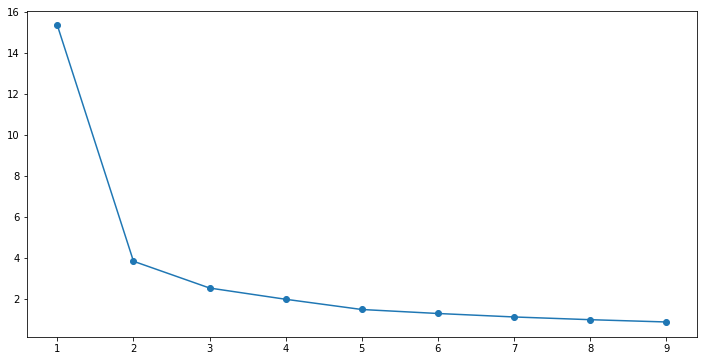

In [13]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
# We should choose No of cluster = 2, as at n =2, there is an elbow on the curve.

In [14]:
kmean = KMeans(n_clusters = 2)
kmean.fit(X)
labels = kmean.labels_
centroids = kmean.cluster_centers_
print(centroids)
print(kmean.inertia_)

[[0.8843928  0.39481383 0.04653437 0.23298203]
 [0.69439246 0.50422933 0.10497732 0.48955419]]
3.855763782517324


In [15]:
X_df = pd.DataFrame(X)
X_df['group'] = labels
X_df['group'].value_counts()
# At n = 2 we are getting balance allocation of data items in both groups.

1    225
0    173
Name: group, dtype: int64

In [16]:
X_df.head()

,disp,hp,acc,yr,group
0,0.900634,0.381376,0.035204,0.205356,0
1,0.889698,0.419429,0.029233,0.177940,0
2,0.886606,0.418210,0.030669,0.195165,0
3,0.877719,0.433085,0.034647,0.202106,0
4,0.887413,0.411384,0.030854,0.205692,0


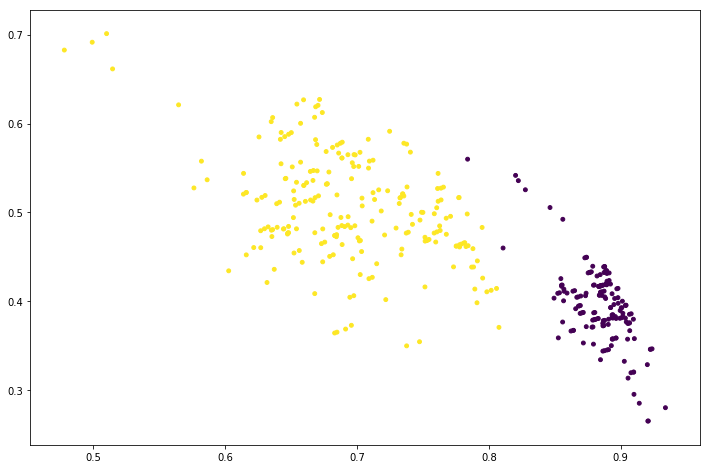

In [17]:
plt.figure(figsize=(12,8)) 
plt.scatter(X_df['disp'], X_df['hp'], s=15, c = X_df['group'])

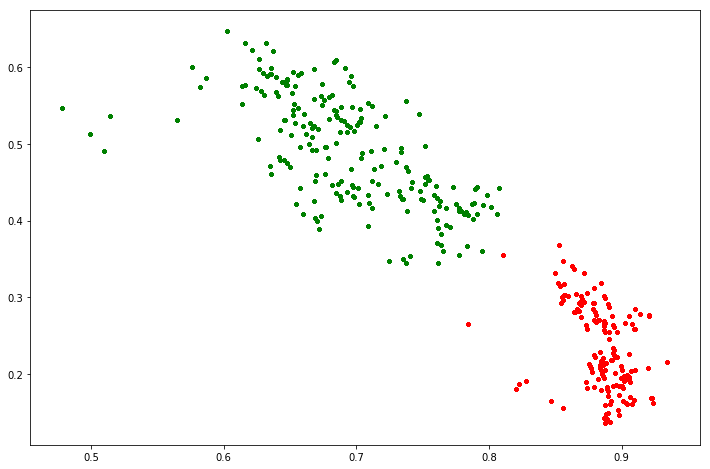

In [23]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
plt.figure(figsize=(12,8))

for i in labels:
        points = np.array(X_df.loc[X_df['group'] == i])
        plt.scatter(points[:,0], points[:, 3], s=7, c=colors[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F31055F550>,
      dtype=object)

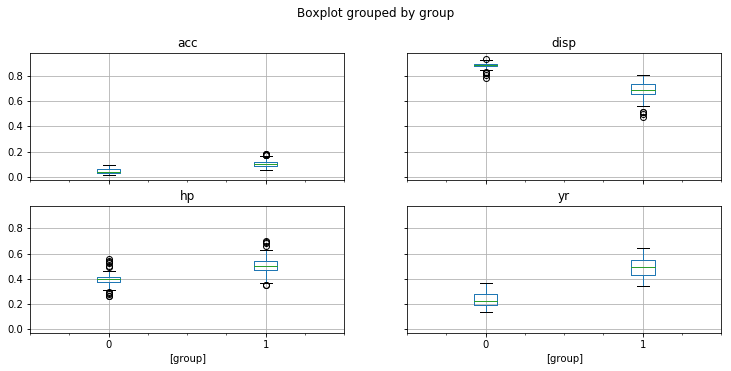

In [19]:
X_df.boxplot(by = 'group', figsize=(12,8), layout=(3,2))
# From box plot we observe that the plots for 0 and 1 classes are non overlapping.

## Hierarchial Clustering
### Lets try to do clustering following this technique also.

In [40]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [41]:
df = X.drop('group', axis =1)

In [42]:
Z = linkage(df,'single')
c, coph_dists = cophenet(Z,pdist(df))
print('single', c)
Z = linkage(df,'complete')
c, coph_dists = cophenet(Z,pdist(df))
print('complete', c)
Z = linkage(df,'average')
c, coph_dists = cophenet(Z,pdist(df))
print('average', c)
Z = linkage(df,'ward')
c, coph_dists = cophenet(Z,pdist(df))
print('ward', c)
# The cophenatic correlation is in range from 0.829 to 0.852. So lets try to create dendograms from all methods
# After creating dendograms from all methods, i choose ward methods as its giving me good dendrogram.

single 0.8292782995260495
complete 0.8441715104287426
average 0.8521351990905535
ward 0.8384779463137624


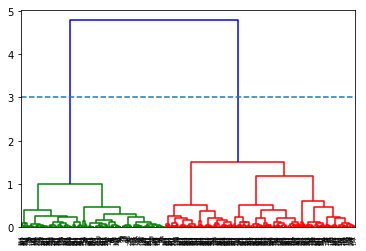

In [46]:
dend = sch.dendrogram(sch.linkage(df,'ward'))
plt.axhline(y = 3, linestyle = '--')

In [47]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage = 'ward')
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [48]:
df['labels'] = cluster.labels_
df.groupby(['labels']).count()
# Here we have chosen 2 clusters and for both there is almost similar number of data points
# Also the result from KMEans clustering and Hierarchical clustering are similar.

,disp,hp,acc,yr
labels,,,,
0,226,226,226,226
1,172,172,172,172


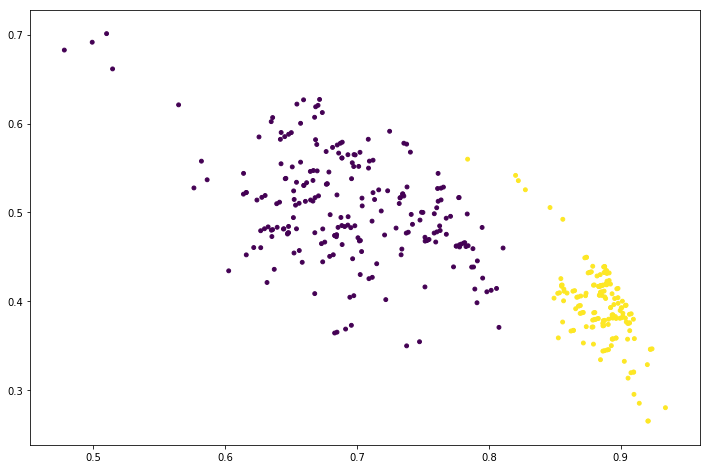

In [49]:
plt.figure(figsize=(12,8)) 
plt.scatter(df['disp'], df['hp'], s=15, c = df['labels'])

## Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [118]:
data_df['group'] = cluster.labels_

In [119]:
data_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg,group
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0,1
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0,1
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0,1
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0,1
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0,1


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [142]:
# Checking LR model on whole dataset
xdata = data_df.iloc[:,1:7]
ydata = data_df.iloc[:,7]
x_train,x_test,y_train,y_test = train_test_split(xdata,ydata,test_size = 0.3, random_state = 12)
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Test Accuracy score',lr.score(x_test,y_test))
print(xdata.columns)
print('Coeffecients for above columns are:',lr.coef_)
print('intercept is',lr.intercept_)

Test Accuracy score 0.841579156502769
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')
Coeffecients for above columns are: [-0.1676288   0.00598427  0.00857603 -0.00717974  0.12479644  0.79863646]
intercept is -18.90980328413465


In [52]:
grp1_df = data_df.loc[data_df['group']==1]
grp0_df = data_df.loc[data_df['group']==0]
grp0_df.shape,grp1_df.shape

((226, 9), (172, 9))

In [135]:
# Checking MPG for both clusters, to check difference in data between clusters.
# For group 0 the mean for mpg is 28.6
grp0_df.iloc[:,7].describe()

count    226.000000
mean      28.673451
std        5.974115
min       16.200000
25%       24.225000
50%       28.000000
75%       32.400000
max       46.600000
Name: mpg, dtype: float64

In [137]:
# For group 1 the mean for mpg is 16.73
grp1_df.iloc[:,7].describe()

count    172.000000
mean      16.736047
std        3.670984
min        9.000000
25%       14.000000
50%       16.000000
75%       19.000000
max       38.000000
Name: mpg, dtype: float64

In [143]:
# Lets first do regression on class 0
# Like we did in clustering we shall ignore cols carname
xdata = grp0_df.iloc[:,1:7]
ydata = grp0_df.iloc[:,7]
x_train,x_test,y_train,y_test = train_test_split(xdata,ydata,test_size = 0.3, random_state =12)
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Test Accuracy score',lr.score(x_test,y_test))
print(xdata.columns)
print('Coeffecients for above columns are:',lr.coef_)
print('intercept is',lr.intercept_)

Test Accuracy score 0.7145943643332406
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')
Coeffecients for above columns are: [ 1.30437462 -0.04792277 -0.09765959 -0.00477624  0.00657686  0.95007316]
intercept is -25.59368438085713


In [144]:
# Lets first do regression on class 1
# Like we did in clustering we shall ignore cols carname
xdata = grp1_df.iloc[:,1:7]
ydata = grp1_df.iloc[:,7]
x_train,x_test,y_train,y_test = train_test_split(xdata,ydata,test_size = 0.3, random_state =12)
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Test Accuracy score',lr.score(x_test,y_test))
print(xdata.columns)
print('Coeffecients for above columns are:',lr.coef_)
print('intercept is',lr.intercept_)

Test Accuracy score 0.7313034622632337
Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr'], dtype='object')
Coeffecients for above columns are: [-0.72577557  0.00444764 -0.01991223 -0.00278628 -0.12635675  0.51386898]
intercept is -2.734298295264548
